In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("Data/MY2022 Fuel Consumption Ratings.csv")

In [3]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


**Fuel consumption(연료 소비량)**

도시 및 고속도로 연료 소비 등급은 100km(L/100km)당 리터 단위로 표시됩니다. 복합 등급(55% 도시, 45% 고속도로)은 L/100km 및 마일/임페리얼 갤런(mpg) 단위로 표시됩니다.

**CO2 emissions(CO2 배출량)**

도시와 고속도로의 복합 운행을 위한 이산화탄소 배출량(km당 그램)입니다.

**CO2 rating(CO2 등급)**

1(최악)에서 10(최고)까지의 등급으로 등급이 매겨진 이산화탄소의 테일파이프 배출량.

**Smog rating(스모그 등급)**

스모그를 형성하는 오염물질의 테일파이프 배출량(최악)은 1에서 10(최고)까지의 등급입니다

In [4]:
# 데이터 프레임의 정보를 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [5]:
# 요약 통계량을 출력
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [6]:
# nunuque() 함수로 데이터의 고유값들의 수를 출력
# sort_values 함수로 데이터 값을 기준으로 데이터 정렬
# ascending = False 옵션으로 내림차 순 정렬

df.nunique().sort_values(ascending = False)

Model                                715
CO2 Emissions(g/km)                  242
Fuel Consumption (City (L/100 km)    149
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (mpg))          49
Make                                  39
Engine Size(L)                        36
Transmission                          23
Vehicle Class                         14
CO2 Rating                            10
Cylinders                              8
Smog Rating                            5
Fuel Type                              4
Model Year                             1
dtype: int64

자동차 모델이 너무 많아 분석에 도움이 되지 않습니다.

-> 자동차 모델 삭제

모델 연도가 1년밖에 없어 유의미 하지 않음

-> 모델 연도 삭제

<AxesSubplot:>

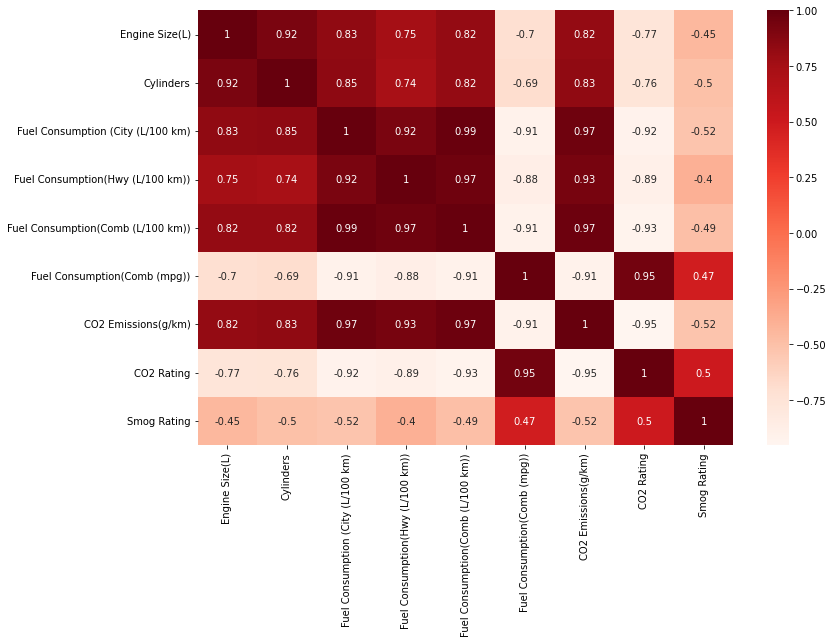

In [7]:
# 수치형 변수들 간의 상관 계수 확인

# drop() 함수로 필요 없는 열 삭제
# corr() 함수로 상관 계수 확인
corr_matrix = df.drop(['Model Year'], axis = 1).corr()

# 그래프 그리기
plt.figure(figsize=(12,8))

# annot = True : 수치 표시
# cmap : 색깔 선정
sns.heatmap(corr_matrix, annot = True, cmap='Reds')

Text(0.5, 0, 'CO2 Emissions')

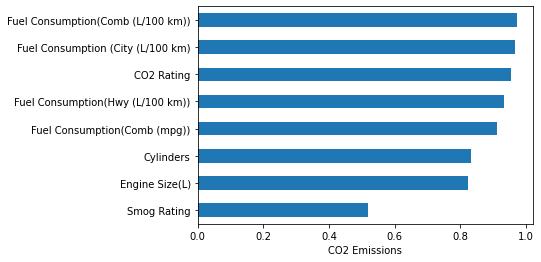

In [8]:
# 어떤 속성이 co2 배출량과 더 높은 상관 관계를 가지고 있는지 확인

corr_matrix = abs(corr_matrix['CO2 Emissions(g/km)']).sort_values(ascending = True)[:-1].plot.barh()
plt.xlabel('CO2 Emissions')

연료 소비량이 더 높은 상관관계를 가지고 있다는 것을 알 수 있지만 스모그 등급을 제외한 다른 속성들도 높은 상관관계를 가지고 있다는 것도 알 수 있습니다. 어떤 식으로 상관관계가 있는지 보기 위해 그림을 그려봅시다.

<Figure size 1440x720 with 0 Axes>

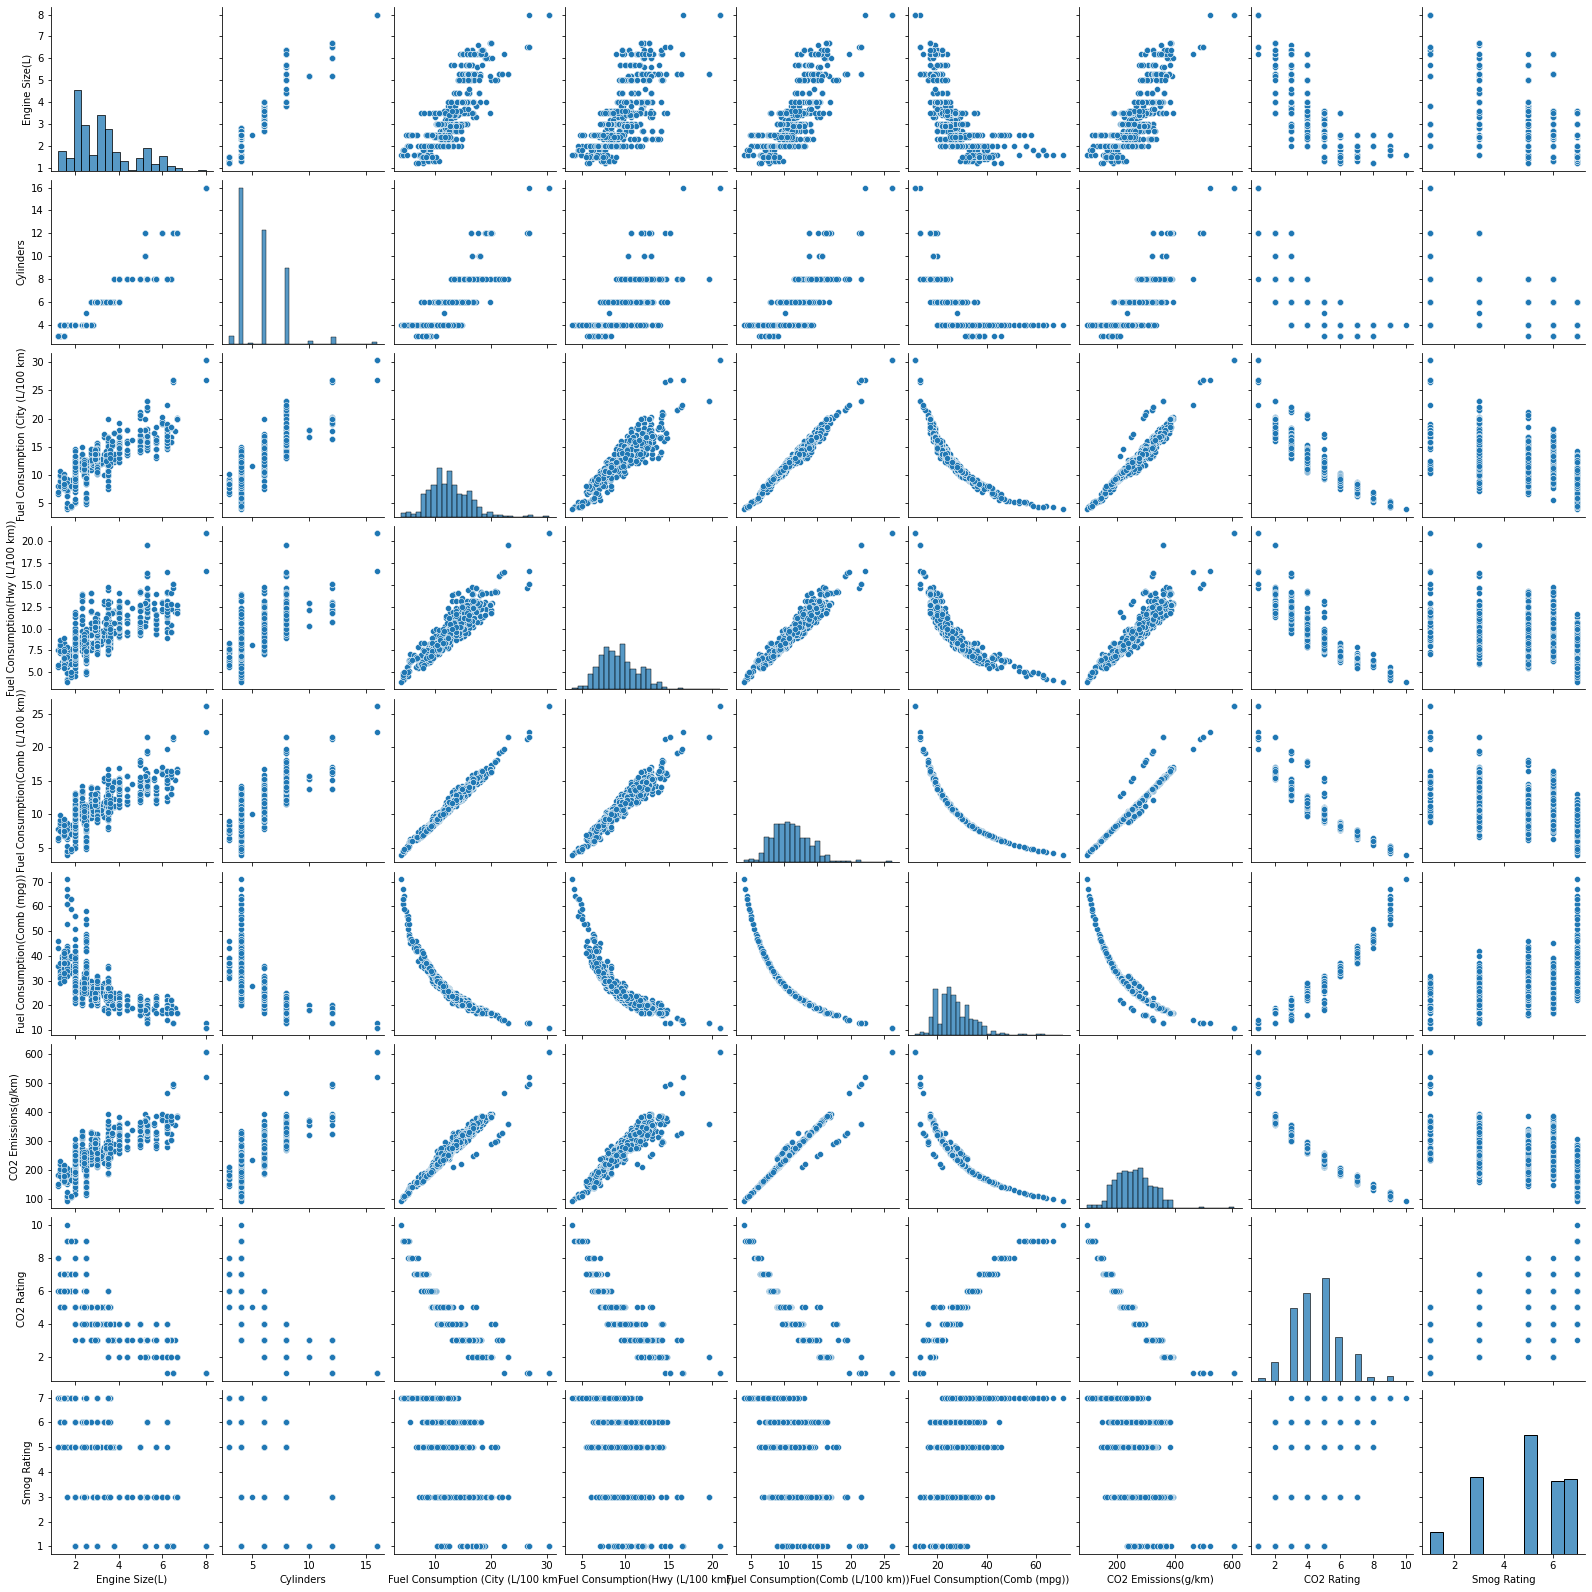

In [9]:
plt.figure(figsize = (20,10))
sns.pairplot(df.drop('Model Year', axis = 1))

우리는 거의 모든 속성이 CO2 배출과 상관관계가 있다는 것을 알 수 있지만 스모그 등급은 명확한 상관관계를 볼 수 없고 그것은 많은 수평선을 가지고 있고 우리는 우리의 모델에서 그것을 재현하고 싶지 않기 때문에 나중에 그것을 제거할 것이다.

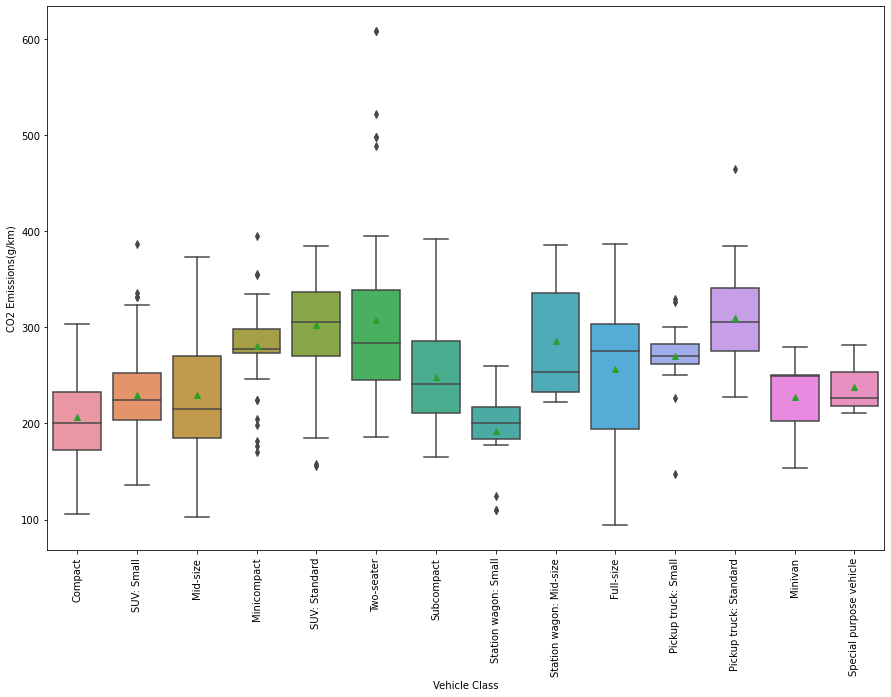

In [10]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df,showmeans=True);


(14, 2)


<Figure size 1440x864 with 0 Axes>

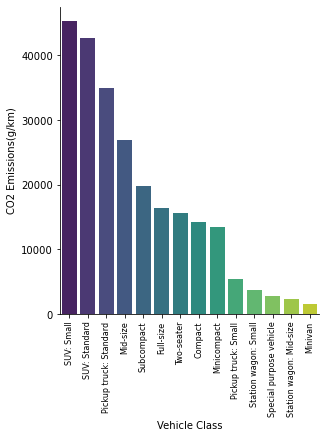

In [11]:
# 위에서는 수치형 속성을 확인하였고 지금부터는 명목형 속성을 확인

df_make = df[['Vehicle Class', 'CO2 Emissions(g/km)']]

# groupby() 함수로 그룹 데이터를 요약
# reset_index: row name을 column으로 변환
df_make = df_make.groupby('Vehicle Class').sum().sort_values(by = 'CO2 Emissions(g/km)', ascending = False)[:20].reset_index()
print(df_make.shape)

plt.figure(figsize = (20,12))

# 범주형 데이터이기 때문에 catplot 사용
sns.catplot(x = 'Vehicle Class', y = 'CO2 Emissions(g/km)', kind = 'bar', data = df_make, palette='viridis')

plt.xticks(rotation = 90, fontsize = 8)

plt.show()

SUV:Small,SUV:Standar,픽업트럭:Standart 및 Mid Size는 CO2 배출량이 높은 클래스입니다.

<Figure size 1440x864 with 0 Axes>

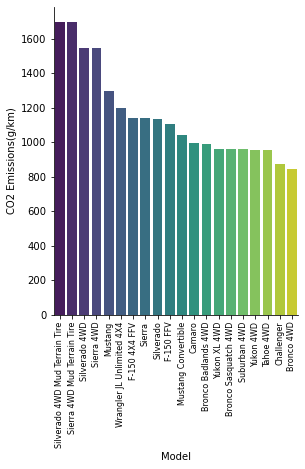

In [12]:
df_make = df[['Model', 'CO2 Emissions(g/km)']]
df_make = df_make.groupby('Model').sum().sort_values(by = 'CO2 Emissions(g/km)', ascending = False)[:20].reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'Model', y = 'CO2 Emissions(g/km)', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

<Figure size 1440x864 with 0 Axes>

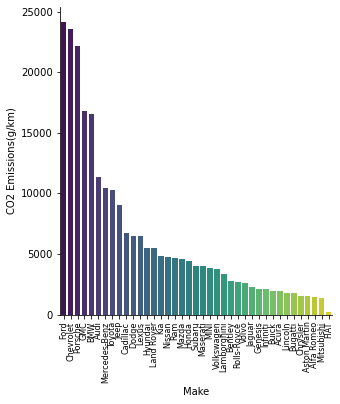

In [13]:
df_make = df[['Make', 'CO2 Emissions(g/km)']]
df_make = df_make.groupby('Make').sum().sort_values(by = 'CO2 Emissions(g/km)', ascending = False).reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'Make', y = 'CO2 Emissions(g/km)', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

<Figure size 1440x864 with 0 Axes>

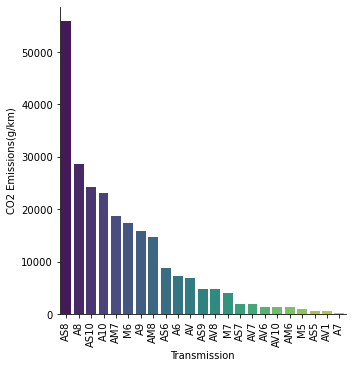

In [14]:
df_make = df[['Transmission', 'CO2 Emissions(g/km)']]
df_make = df_make.groupby('Transmission').sum().sort_values(by = 'CO2 Emissions(g/km)', ascending = False).reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'Transmission', y = 'CO2 Emissions(g/km)', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

AS8 변속기가 장착된 차량의 CO2 배출량이 더 높고, A7 및 AV1이 장착된 차량의 CO2 배출량이 거의 없으므로, 해당 변속기가 장착된 차량을 구입하십시오. 녹색:)

<Figure size 1440x864 with 0 Axes>

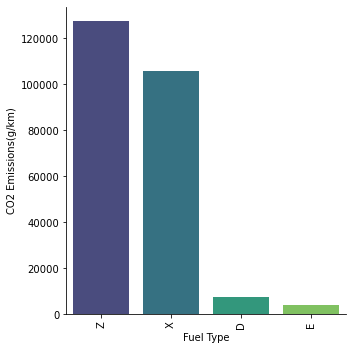

In [15]:
df_make = df[['Fuel Type', 'CO2 Emissions(g/km)']]
df_make = df_make.groupby('Fuel Type').sum().sort_values(by = 'CO2 Emissions(g/km)', ascending = False).reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'Fuel Type', y = 'CO2 Emissions(g/km)', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

Z: 프리미엄 가솔린. 그 프리미엄 X: 일반 가솔린은 아닐 수도 있습니다. D: 디젤 E: 에탄올 가솔린 전체는 CO2 배출량이 높습니다.

In [16]:
# 테스트, 훈련 세트 구분
# random_state : 데이터 분할 시 셔플이 이루어지는데 이를 위한 시드값
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
# 모델 속성 분리
num_attributes = ['Engine Size(L)', 'Fuel Consumption (City (L/100 km)', 
                 'Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Hwy (L/100 km))',
                 'Fuel Consumption(Comb (mpg))',
                  'CO2 Rating']
cat_attributes = ['Make', 'Vehicle Class', 'Fuel Type', 'Transmission']

수치 속성을 스케일링하고 범주 속성을 인코딩하는 파이프라인을 만들면 null 값이 없으므로 인퓨터를 추가하지 않는다.

In [18]:
# Pipeline : croess_validation을 위해 사용
# StandardScaler : 표준화 (평균값(.mean())과 분산값(.var())을 구하기 위해 사용합니다.)
# MinMax Scaling: 정규화 (피쳐 단위를 맞춰준 다음 최대값과 최소값을 구할 때 사용합니다.)

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# sparse=False : array 반환, True일 때는 Matrix로 반환
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse=False))
])

In [19]:
# 트레인 셋 변환해줌
# ColumnTransformer?
preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])

In [20]:
preprocess_pipeline.fit(df[num_attributes + cat_attributes])

X_train = preprocess_pipeline.transform(train_set[num_attributes + cat_attributes])

X_train

array([[ 0.87422991,  0.40390249,  0.31582796, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29202541,  0.31695147,  0.24625682, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29202541, -0.0308526 , -0.27552671, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.58128135, -0.69747706, -0.69295353, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23626141, -1.16121582, -1.24952264, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.87422991,  1.04154328,  0.9419682 , ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
y_train = train_set['CO2 Emissions(g/km)']
y_train

77     279
247    277
250    242
82     214
549    157
      ... 
106    279
270    305
860    213
435    175
102    322
Name: CO2 Emissions(g/km), Length: 756, dtype: int64

# 모델 생성
모델 생성부터 시작해 보겠습니다. Decision 트리에서 어떻게 진행되는지 보겠지만 랜덤 포레스트에서 조금 더 나은지 알아보겠습니다. 하지만 먼저 모델의 점수를 볼 수 있는 함수를 만들겠습니다.

In [22]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

In [23]:
# Decision 트리 확인
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

모델을 교육하려면 교차 검증을 사용하여 오버피팅을 방지합니다.

In [24]:
from sklearn.model_selection import cross_val_score

# cross_val_score : 내부에서 학습, 예측, 평가를 한꺼번에 시켜주므로 간단하게 교차 검증을 수행 가능하고 하나의 평가 지표를 반환
# (분류,회귀인지 선택 / 데이터 셋 / 예측 성능 평가 지표 / 교차 검증 폴드 수)
# neg_mean_squared_error : 오차가 크면 좋다!
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
tree_scores

array([-828.10526316,   -7.17105263,  -12.82894737, -162.99269006,
        -15.68421053,   -5.75      ,   -6.49333333,   -7.68      ,
         -6.20592593,  -23.20333333])

In [25]:
# np.sqrt : 제곱 근 계산

tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores

array([28.77681816,  2.67788212,  3.581752  , 12.76685905,  3.9603296 ,
        2.39791576,  2.54820198,  2.77128129,  2.49116959,  4.81698384])

In [26]:
display_scores(tree_rmse_scores)

Scores:  [28.77681816  2.67788212  3.581752   12.76685905  3.9603296   2.39791576
  2.54820198  2.77128129  2.49116959  4.81698384]
Mean:  6.678919338594011
Standard deviation:  7.937475171745938


In [27]:
# 랜덤 포레스트 확인
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [28]:
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [11.29671348  5.64641685  3.67929438  6.03386168  4.27309615  2.649972
  2.06728061  2.27910251  5.04783245  2.91884267]
Mean:  4.589241277322943
Standard deviation:  2.599634825227929


In [29]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV : 최상의 모델을 찾은 후 훈련 세트 전체를 사용해 최종 모델을 훈련
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
 scoring='neg_mean_squared_error',
return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
# 최적의 파라미터 확인
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [31]:
# 최고 점수가 나왔던 파라미터로 학습된 모델
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [32]:
cvres = grid_search.cv_results_

# mean_test_score : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 수행한 전체 평가의 평균값

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

15.033081474113043 {'max_features': 2, 'n_estimators': 3}
10.201944387135155 {'max_features': 2, 'n_estimators': 10}
9.621666334808937 {'max_features': 2, 'n_estimators': 30}
11.309160062107827 {'max_features': 4, 'n_estimators': 3}
8.107465264144091 {'max_features': 4, 'n_estimators': 10}
8.339045424038112 {'max_features': 4, 'n_estimators': 30}
10.805143234414926 {'max_features': 6, 'n_estimators': 3}
8.001134273281709 {'max_features': 6, 'n_estimators': 10}
7.524859017345796 {'max_features': 6, 'n_estimators': 30}
9.804739945623284 {'max_features': 8, 'n_estimators': 3}
7.74104601493376 {'max_features': 8, 'n_estimators': 10}
7.026082822333874 {'max_features': 8, 'n_estimators': 30}
11.185754546557352 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
8.764651612577852 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
9.27252018916304 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
7.860696845551342 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [33]:
from sklearn.metrics import mean_squared_error
final_model = grid_search.best_estimator_
X_test = preprocess_pipeline.transform(test_set[num_attributes + cat_attributes])
y_test = test_set['CO2 Emissions(g/km)']
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse.round(4)

4.1367

In [34]:
forest_rmse_scores

array([11.29671348,  5.64641685,  3.67929438,  6.03386168,  4.27309615,
        2.649972  ,  2.06728061,  2.27910251,  5.04783245,  2.91884267])

In [35]:
final_rmse

4.136726865403448

In [36]:
X_train

array([[ 0.87422991,  0.40390249,  0.31582796, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29202541,  0.31695147,  0.24625682, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29202541, -0.0308526 , -0.27552671, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.58128135, -0.69747706, -0.69295353, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23626141, -1.16121582, -1.24952264, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.87422991,  1.04154328,  0.9419682 , ...,  0.        ,
         0.        ,  0.        ]])

Text(0.5, 0, 'Random Forest Feature Importance')

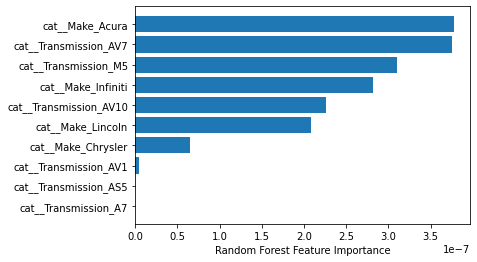

In [38]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

FeatureNames = preprocess_pipeline.get_feature_names_out()
sorted_idx = rf.feature_importances_.argsort()
plt.barh(FeatureNames[sorted_idx][:10], rf.feature_importances_[sorted_idx][:10])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
rf.feature_importances_

array([1.04866204e-03, 1.57270739e-02, 2.56257210e-01, 2.04641119e-03,
       3.96682610e-02, 6.81209260e-01, 3.77785401e-07, 9.28046330e-07,
       8.09329437e-07, 5.14839825e-06, 1.55388980e-05, 2.36607154e-06,
       3.86664575e-04, 7.44297265e-07, 9.66444219e-07, 2.13685140e-05,
       6.49684963e-08, 2.28252627e-06, 5.22573614e-06, 4.36971125e-05,
       2.04853482e-05, 2.89673803e-06, 4.03628883e-06, 2.41469922e-05,
       2.81660773e-07, 2.20171451e-06, 7.76610257e-06, 8.94642508e-06,
       1.09997833e-04, 4.89120912e-06, 9.06503190e-06, 2.07833974e-07,
       6.00226950e-06, 4.59415775e-06, 2.29859213e-06, 3.68510321e-06,
       2.82013838e-06, 1.07838384e-06, 1.35693076e-05, 2.98042340e-05,
       6.83818338e-06, 1.87263078e-06, 4.61065028e-06, 6.42878830e-07,
       8.94559650e-07, 7.11199691e-06, 2.10149645e-05, 9.88895926e-06,
       1.38517042e-05, 4.19071420e-07, 1.68245685e-05, 1.89649810e-04,
       1.35747556e-05, 1.66742953e-05, 4.80547235e-04, 1.68380299e-06,
      